# Testing different CAEs and VAEs with experiment dataset

This experiments tests the different implementations of the CAEs and VAEs in ../autoencoders with the experiment dataset defined in ../experiment_datasets/single_point.py to evaluate their performances when reconstructing a single point with variated spatial position.

## Testing Convolutional Autoencoder (CAE)

In [1]:
from autoencoders.CAE import CAE, CAECoordConv
from autoencoders.VAE import VAEBallTrackNoPaddle
from experiment_datasets.single_point import generate_single_point
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

devices = tf.config.list_physical_devices('GPU')

if len(devices) < 1:
    raise Exception("Cannot initialize GPU")

print("GPU configured correctly")

GPU configured correctly


In [ ]:
def train_model(ModelClass, dataset, validation, batch_size):
    model = ModelClass(
        layers=2,
        input_shape=INPUT_SHAPE,
        latent_size=8,
        filters=8,
        kernel_size=3,
        name="Model"
    )

    _ = model.train_primitive(
        dataset, 
        validation, 
        epochs=250,
        batch_size=batch_size,
        callbacks=callbacks
    )

    return model.evaluate(validation)



In [3]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=50)
]

losses_cae = []
losses_cae_coord = []
losses_vae_balltrack = []
idxs = []

for i in range(5, 30, 2):
    dataset, validation = generate_single_point(i, i, validation_split=0.15)
    INPUT_SHAPE = dataset.shape[1:]
    pixels = INPUT_SHAPE[0] * INPUT_SHAPE[1]

    batch_size = dataset.shape[0] if dataset.shape[0] < 32 else 32

    loss = train_model(CAE, dataset, validation, batch_size)
    losses_cae.append(loss)

    loss = train_model(CAECoordConv, dataset, validation, batch_size)
    losses_cae_coord.append(loss)

    loss = train_model(VAEBallTrackNoPaddle, dataset, validation, batch_size)
    losses_vae_balltrack.append(loss)

    idxs.append(i)

    print(f"Size {i} done")


- ball_loss: 2.4843 - val_loss: 5.3134 - val_kl_loss: 2.7382 - val_ball_loss: 2.5752
Epoch 102/250
23/23 [==============================] - 1s 32ms/step - loss: 5.3951 - kl_loss: 2.8081 - ball_loss: 2.5404 - val_loss: 5.3166 - val_kl_loss: 2.8306 - val_ball_loss: 2.4860
Epoch 103/250
23/23 [==============================] - 1s 29ms/step - loss: 5.3882 - kl_loss: 2.7162 - ball_loss: 2.6816 - val_loss: 5.5174 - val_kl_loss: 2.8560 - val_ball_loss: 2.6614
Epoch 104/250
23/23 [==============================] - 1s 27ms/step - loss: 5.2939 - kl_loss: 2.9231 - ball_loss: 2.4463 - val_loss: 5.4363 - val_kl_loss: 3.0447 - val_ball_loss: 2.3916
Epoch 105/250
23/23 [==============================] - 1s 27ms/step - loss: 5.3779 - kl_loss: 2.9012 - ball_loss: 2.4470 - val_loss: 5.9914 - val_kl_loss: 2.9063 - val_ball_loss: 3.0851
Epoch 106/250
23/23 [==============================] - 1s 27ms/step - loss: 5.4877 - kl_loss: 2.8986 - ball_loss: 2.5287 - val_loss: 5.6561 - val_kl_loss: 2.9363 - val_bal

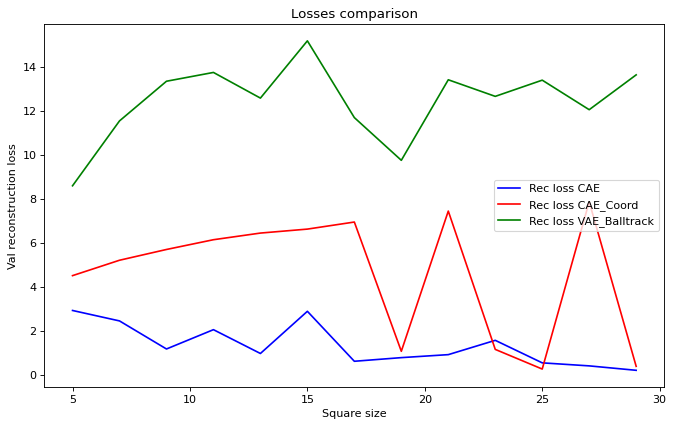

In [10]:
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(idxs, losses_cae, 'b', label='Rec loss CAE')
plt.plot(idxs, losses_cae_coord, 'r', label='Rec loss CAE_Coord')
plt.plot(idxs, losses_vae_balltrack, 'g', label='Rec loss VAE_Balltrack')
plt.title('Losses comparison')
plt.xlabel('Square size')
plt.ylabel('Val reconstruction loss')
plt.legend()